# 0. Setup
Pull in respective libraries to prepare the notebook environment

In [1]:
# save the working directory path for later use

import os
HOME = os.getcwd()
print(HOME)

/home/mgama1/Desktop


In [2]:
# clone project repository and install dependencies

!git clone https://github.com/ultralytics/yolov5.git # clone
%cd {HOME}/yolov5
%pip install -r requirements.txt # install

import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v7.0-175-g5f11555 Python-3.9.7 torch-1.13.1+cu117 CPU


Setup complete ✅ (4 CPUs, 7.7 GB RAM, 75.1/99.4 GB disk)


In [3]:
# download pretrained weights

from utils.downloads import attempt_download

p5 = ['n', 's', 'm', 'l', 'x']  # P5 models
cls = [f'{x}-seg' for x in p5]  # segmentation models

for x in cls:
    attempt_download(f'{HOME}/yolov5/weights/yolov5{x}.pt')

  0%|          | 0.00/4.11M [00:00<?, ?B/s]

  0%|          | 0.00/14.9M [00:00<?, ?B/s]

  0%|          | 0.00/42.4M [00:00<?, ?B/s]

  0%|          | 0.00/91.9M [00:00<?, ?B/s]

  0%|          | 0.00/170M [00:00<?, ?B/s]

In [7]:
ls

benchmarks.py    data/       LICENSE          requirements.txt  tutorial.ipynb
CITATION.cff     detect.py   models/          segment/          utils/
classify/        export.py   README.md        setup.cfg         val.py
CONTRIBUTING.md  hubconf.py  README.zh-CN.md  train.py          weights/


# 4. Train On Custom Data

To train on custom data, we need to prepare a dataset with custom labels.





### Load Custom Dataset

Next, we'll export our dataset into the right directory structure for training YOLOv5 segmentation to load into this notebook. Select the `Export` button at the top of the version page, `YOLO v5 Pytorch` type, and `show download code`.

This ensures all our directories are in the right format with the needed data.yaml file:

```
dataset
├── train
│   ├── images
│   │   ├── IMG_123.jpg
│   └── labels
│       ├── IMG_123.txt
├── valid
│   ├── images
│   │   ├── IMG_456.jpg
│   └── labels
│       ├── IMG_456.txt
├── test
│   ├── images
│   │   ├── IMG_789.jpg
│   └── labels
│       ├── IMG_789.txt
├── data.yaml
```





### Train On Custom Data 🎉



/content/yolov5
segment/train: weights=yolov5s-seg.pt, cfg=, data=/content/yolov5/dataset/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=128, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train-seg, name=custom-dataset, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, mask_ratio=4, no_overlap=False
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-175-g5f11555 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015,

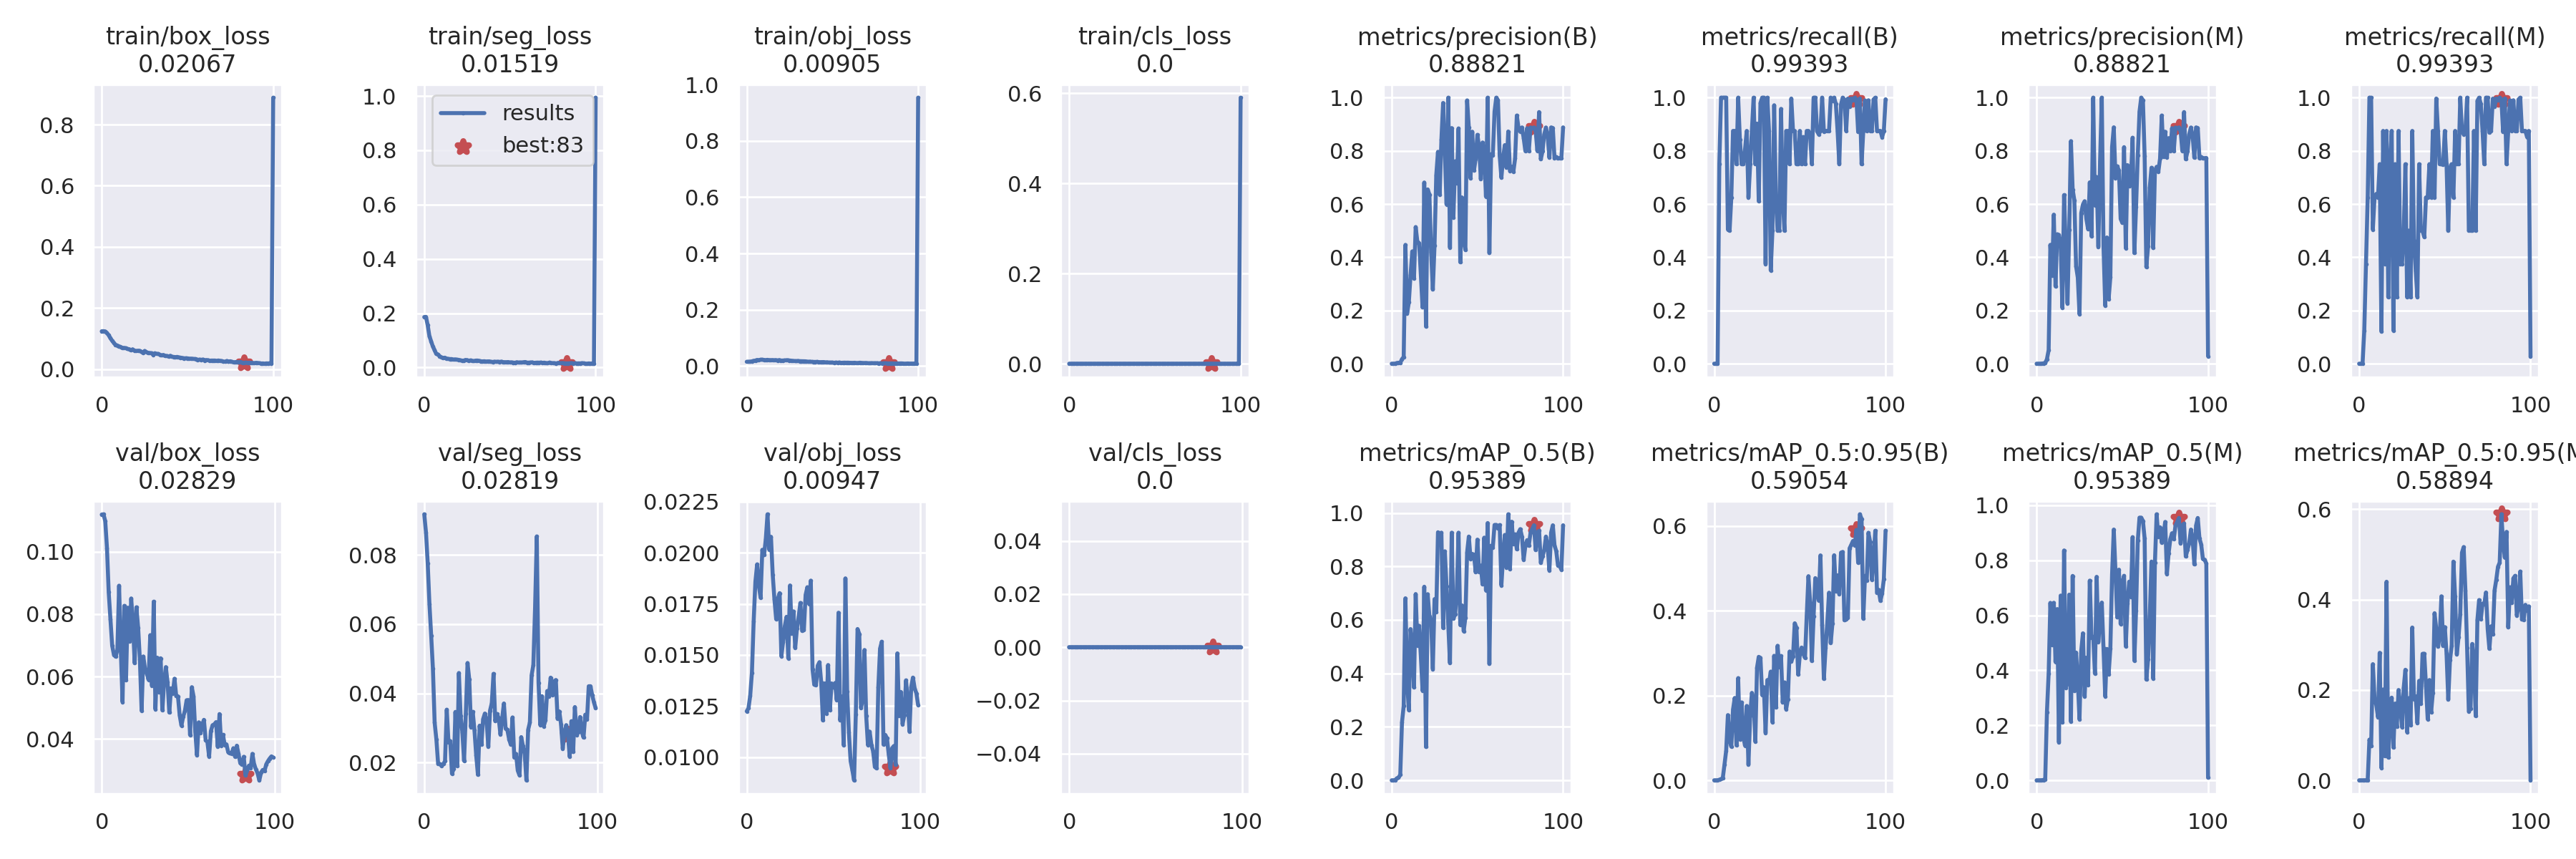

In [9]:
%cd {HOME}/yolov5 
!python segment/train.py --img 320 --batch 128 --epochs 100 --data /content/yolov5/dataset/data.yaml --weights yolov5s-seg.pt --name custom-dataset
display.Image(filename=f'{HOME}/yolov5/runs/train-seg/custom-dataset/results.png', width=1200)

Above we see training plots for our custom trained model. This plot along with other detailed results and sample predictions are all automatically generated and stored in the `runs` folder. See `runs/train-seg/exp`.

### Validate Your Custom Model

Repeat step 2 from above to test and validate your custom model.

In [11]:
%cd {HOME}/yolov5
!python segment/val.py --weights {HOME}/yolov5/runs/train-seg/custom-dataset/weights/best.pt --data ./dataset/data.yaml --img 320  --name custom-dataset

/home/mgama1/Desktop/yolov5
segment/val: data=./dataset/data.yaml, weights=['/home/mgama1/Desktop/yolov5/runs/train-seg/custom-dataset/weights/best.pt'], batch_size=32, imgsz=320, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val-seg, name=custom-dataset, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-175-g5f11555 Python-3.9.7 torch-1.13.1+cu117 CPU

Fusing layers... 
Model summary: 165 layers, 7398422 parameters, 0 gradients, 25.7 GFLOPs
val: Scanning /home/mgama1/Desktop/yolov5/dataset/labels/val... 8 images, 0 back
val: New cache created: /home/mgama1/Desktop/yolov5/dataset/labels/val.cache
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all          8          8      0.888      0.994      0.954      0.591      0.888      0.994      0.954      0.543
Speed: 0.3ms pre-pro

### Infer With Your Custom Model

In [61]:

!python segment/predict.py --img 640 --weights ./runs/train-seg/custom-dataset/weights/best.pt --source s3.png --name custom-dataset   --conf-thres .25 --exist-ok --dnn

segment/predict: weights=['./runs/train-seg/custom-dataset/weights/best.pt'], source=s3.png, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=custom-dataset, exist_ok=True, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=True, vid_stride=1, retina_masks=False
YOLOv5 🚀 v7.0-175-g5f11555 Python-3.9.7 torch-1.13.1+cu117 CPU

Fusing layers... 
Model summary: 165 layers, 7398422 parameters, 0 gradients, 25.7 GFLOPs
image 1/1 /home/mgama1/Desktop/yolov5/s3.png: 384x640 3 roads, 265.1ms
Speed: 2.0ms pre-process, 265.1ms inference, 1.3ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/predict-seg/custom-dataset
